In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


## Load Dataset

In [2]:
# UK
mobility = pd.read_csv('UK/mobility.csv')
weather = pd.read_csv('UK/weather.csv')
case = pd.read_csv('UK/case.csv')

## Deskripsi Data Mobility

In [3]:
print(mobility.shape)
mobility.head()

(320, 7)


,date,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,2020-04-15,-79,-32,-6,-78,-77,34
1,2020-04-16,-79,-32,-15,-79,-76,34
2,2020-04-17,-81,-34,-43,-79,-75,36
3,2020-04-18,-84,-38,-47,-77,-59,23
4,2020-04-19,-83,-42,-6,-75,-56,17


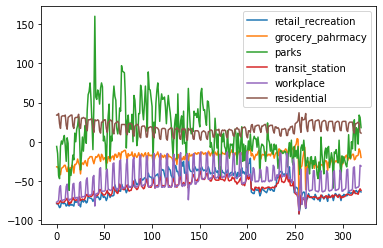

In [4]:
mobility.plot()
plt.show()

## Deskripsi Data Weather

In [5]:
print(weather.shape)
weather.head()

(320, 4)


,date,mxt,mnt,avt
0,2020-04-15,18.2,6.5,12.35
1,2020-04-16,18.2,6.5,12.35
2,2020-04-17,18.2,6.5,12.35
3,2020-04-18,18.2,6.5,12.35
4,2020-04-19,18.2,6.5,12.35


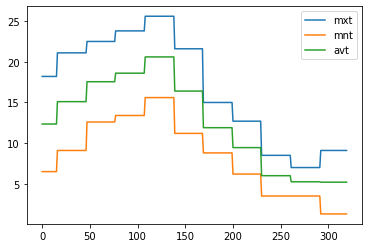

In [6]:
weather.plot()
plt.show()

## Deskripsi Data Case

In [7]:
print(case.shape)
case.head()

(320, 2)


,date,case
0,2020-04-15,704
1,2020-04-16,689
2,2020-04-17,453
3,2020-04-18,297
4,2020-04-19,418


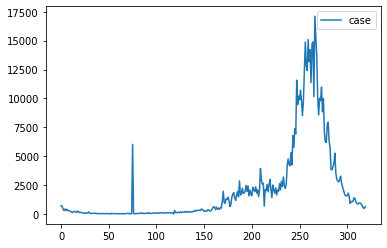

In [8]:
case.plot()
plt.show()

## Gabungkan data menjadi 1 data multivariative

In [9]:
case.date = pd.to_datetime(case.date)

date = case['date'].values

case.set_index('date', inplace=True)

weather.date = pd.to_datetime(weather.date)
weather.set_index('date', inplace=True)

mobility.date = pd.to_datetime(mobility.date)
mobility.set_index('date', inplace=True)

In [10]:
mobility.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-04-15,-79,-32,-6,-78,-77,34
2020-04-16,-79,-32,-15,-79,-76,34
2020-04-17,-81,-34,-43,-79,-75,36
2020-04-18,-84,-38,-47,-77,-59,23
2020-04-19,-83,-42,-6,-75,-56,17


In [11]:
df = pd.merge(case, weather, left_index=True, right_index=True)
df = pd.merge(df, mobility, left_index=True, right_index=True)


In [12]:
df.head()

,case,mxt,mnt,avt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,
2020-04-15,704,18.2,6.5,12.35,-79,-32,-6,-78,-77,34
2020-04-16,689,18.2,6.5,12.35,-79,-32,-15,-79,-76,34
2020-04-17,453,18.2,6.5,12.35,-81,-34,-43,-79,-75,36
2020-04-18,297,18.2,6.5,12.35,-84,-38,-47,-77,-59,23
2020-04-19,418,18.2,6.5,12.35,-83,-42,-6,-75,-56,17


## Pearson Corellation

In [13]:
case = df['case']
for column in df:
    dtt = df[column]
    print(column, 'data: mean=%.3f stdv=%.3f' % (mean(dtt), std(dtt)))
    corr, _ = pearsonr(case, dtt)
    print('Pearsons correlation: %.3f' % corr)

case data: mean=2118.022 stdv=3477.555
Pearsons correlation: 1.000
mxt data: mean=16.816 stdv=6.511
Pearsons correlation: -0.688
mnt data: mean=8.473 stdv=4.426
Pearsons correlation: -0.562
avt data: mean=12.644 stdv=5.401
Pearsons correlation: -0.645
retail_recreation data: mean=-56.350 stdv=15.751
Pearsons correlation: -0.233
grocery_pahrmacy data: mean=-20.413 stdv=8.572
Pearsons correlation: -0.170
parks data: mean=8.166 stdv=33.198
Pearsons correlation: -0.443
transit_station data: mean=-59.938 stdv=10.289
Pearsons correlation: -0.302
workplace data: mean=-49.325 stdv=16.907
Pearsons correlation: -0.131
residential data: mean=18.581 stdv=7.710
Pearsons correlation: 0.211


## Lag Plot

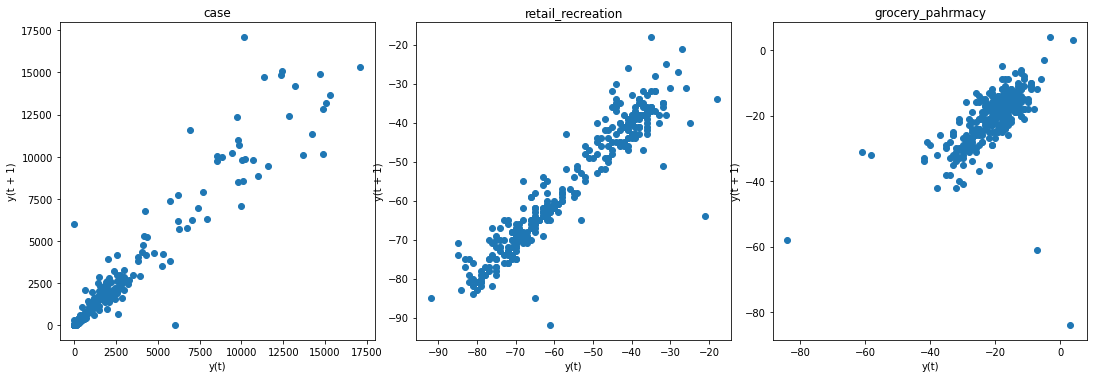

In [14]:
f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['case'], ax=ax1)
ax1.set_title('case');

lag_plot(df['retail_recreation'], ax=ax2)
ax2.set_title('retail_recreation');

lag_plot(df['grocery_pahrmacy'], ax=ax3)
ax3.set_title('grocery_pahrmacy');

plt.show()

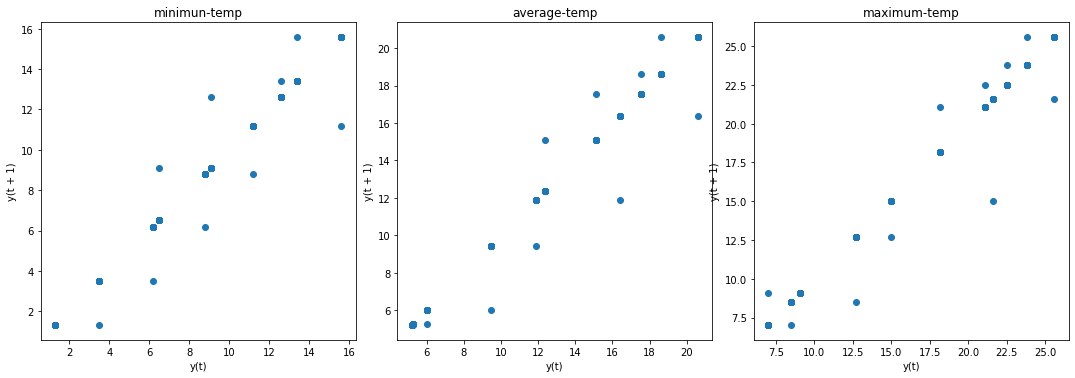

In [15]:
f2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['mnt'], ax=ax4)
ax4.set_title('minimun-temp');

lag_plot(df['avt'], ax=ax5)
ax5.set_title('average-temp');

lag_plot(df['mxt'], ax=ax6)
ax6.set_title('maximum-temp');

plt.show()

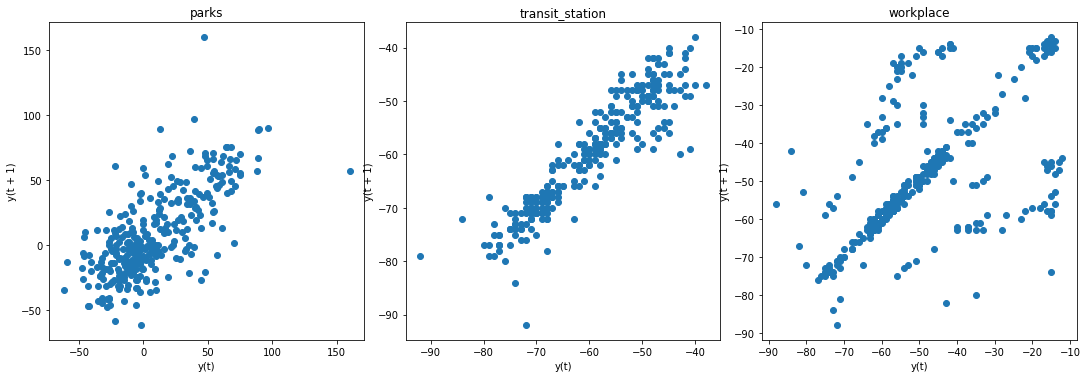

In [16]:
f2, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['parks'], ax=ax7)
ax7.set_title('parks');

lag_plot(df['transit_station'], ax=ax8)
ax8.set_title('transit_station');

lag_plot(df['workplace'], ax=ax9)
ax9.set_title('workplace');

plt.show()

## Plot Auto Correlation

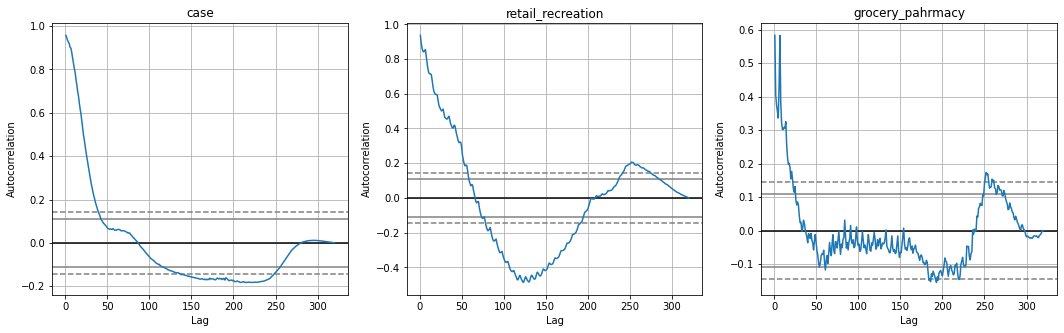

In [17]:
f3, (ax10, ax11, ax12) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['case'], ax=ax10)
ax10.set_title('case');

autocorrelation_plot(df['retail_recreation'], ax=ax11)
ax11.set_title('retail_recreation');

autocorrelation_plot(df['grocery_pahrmacy'], ax=ax12)
ax12.set_title('grocery_pahrmacy');

plt.show()

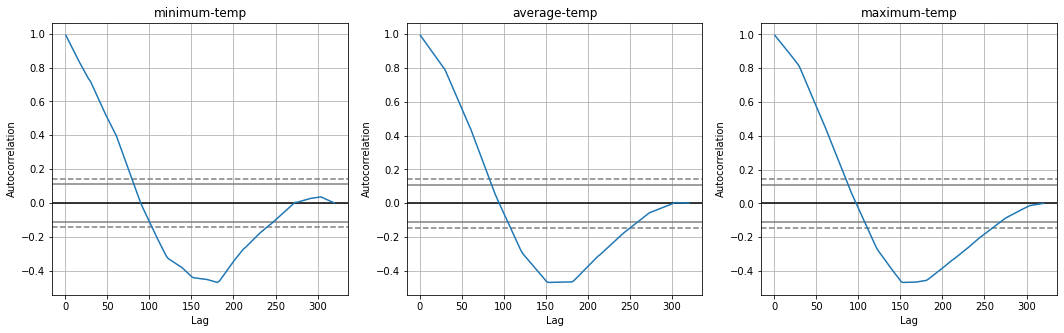

In [18]:
f3, (ax13, ax14, ax15) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['mnt'], ax=ax13)
ax13.set_title('minimum-temp');

autocorrelation_plot(df['avt'], ax=ax14)
ax14.set_title('average-temp');

autocorrelation_plot(df['mxt'], ax=ax15)
ax15.set_title('maximum-temp');

plt.show()

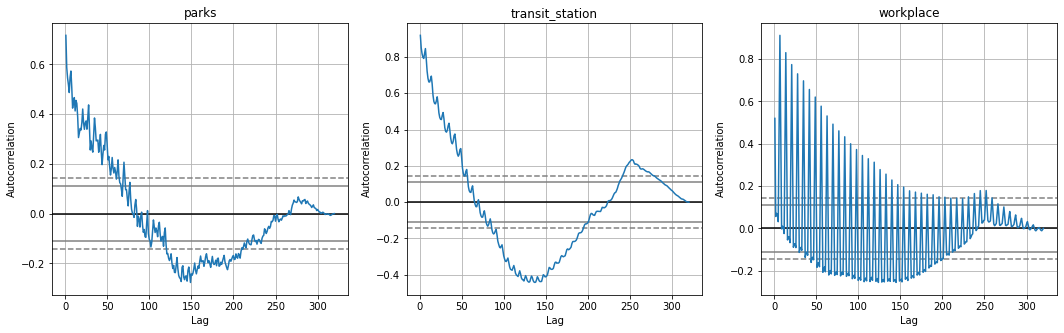

In [19]:
f3, (ax16, ax17, ax18) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['parks'], ax=ax16)
ax16.set_title('parks');

autocorrelation_plot(df['transit_station'], ax=ax17)
ax17.set_title('transit_station');

autocorrelation_plot(df['workplace'], ax=ax18)
ax18.set_title('workplace');

plt.show()

In [20]:
for column in df:
    X = df[column]
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('Hasil mean, variance pada', column, 'adalah :')
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%.2f, variance2=%.2f' % (var1, var2))

Hasil mean, variance pada case adalah :
mean1=167.306250, mean2=4068.737500
variance1=233659.23, variance2=16446794.85
Hasil mean, variance pada mxt adalah :
mean1=22.533125, mean2=11.098125
variance1=4.55, variance2=14.99
Hasil mean, variance pada mnt adalah :
mean1=11.864375, mean2=5.081250
variance1=7.73, variance2=8.54
Hasil mean, variance pada avt adalah :
mean1=17.198750, mean2=8.089688
variance1=5.97, variance2=10.98
Hasil mean, variance pada retail_recreation adalah :
mean1=-56.193750, mean2=-56.506250
variance1=291.59, variance2=207.65
Hasil mean, variance pada grocery_pahrmacy adalah :
mean1=-21.443750, mean2=-19.381250
variance1=44.56, variance2=101.17
Hasil mean, variance pada parks adalah :
mean1=27.937500, mean2=-11.606250
variance1=1133.08, variance2=298.23
Hasil mean, variance pada transit_station adalah :
mean1=-60.056250, mean2=-59.818750
variance1=107.27, variance2=105.77
Hasil mean, variance pada workplace adalah :
mean1=-51.806250, mean2=-46.843750
variance1=322.66

## Split Data Train & Data Test

In [21]:

train_date = date[:int(len(df)*0.8)]
train_df = df[:int(len(df)*0.8)].copy()

test_date = date[int(len(df)*0.8):]
test_df = df[int(len(df)*0.8):].copy()

print(train_df.shape, test_df.shape)

(256, 10) (64, 10)


In [22]:
nobs = 30
train, test = df[0:-nobs], df[-nobs:]

# Check size
print(train.shape)  # (119, 8)
print(test.shape)  # (4, 8)

(290, 10)
(30, 10)


In [23]:
# Fungsi untuk ploting

def plot_sensor(name):
    
    plt.figure(figsize=(16,4))

    plt.plot(train_date, train_df[name], label='train')
    plt.plot(test_date, test_df[name], label='test')
    plt.ylabel(name); plt.legend()
    plt.show()
    
def plot_autocor(name, df):
    
    plt.figure(figsize=(16,4))
    
    timeLags = np.arange(1,100*24)
    plt.plot([df[name].autocorr(dt) for dt in timeLags])
    plt.title(name); plt.ylabel('autocorr'); plt.xlabel('time lags')
    plt.show()

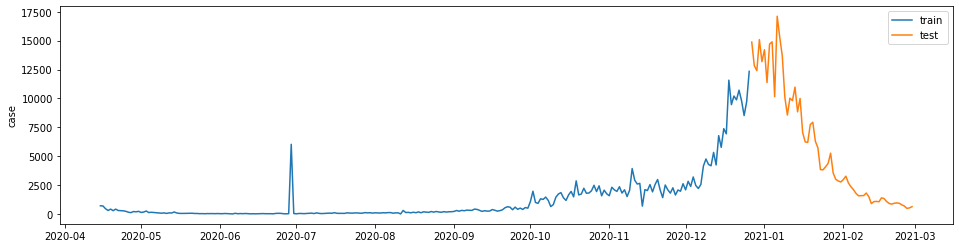

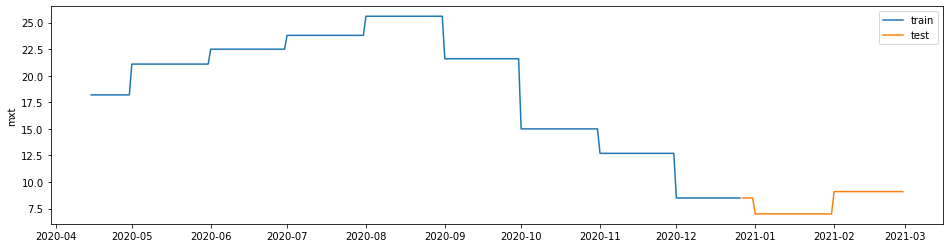

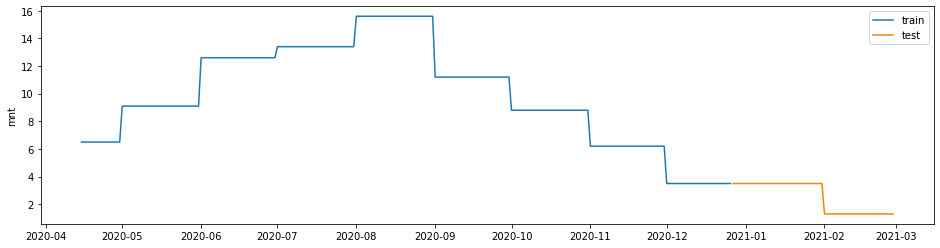

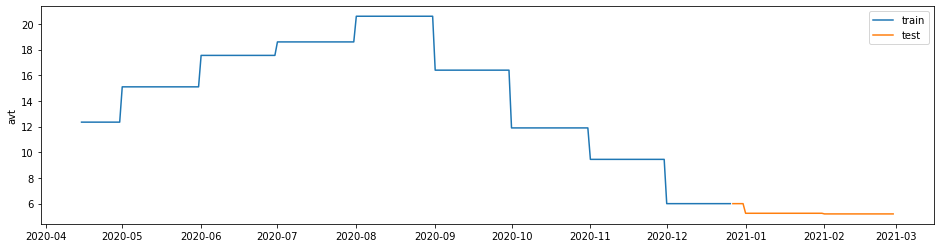

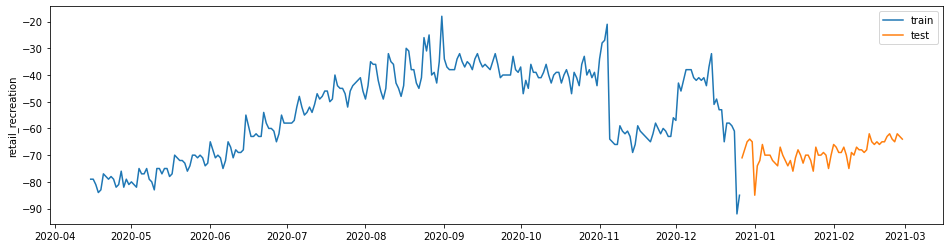

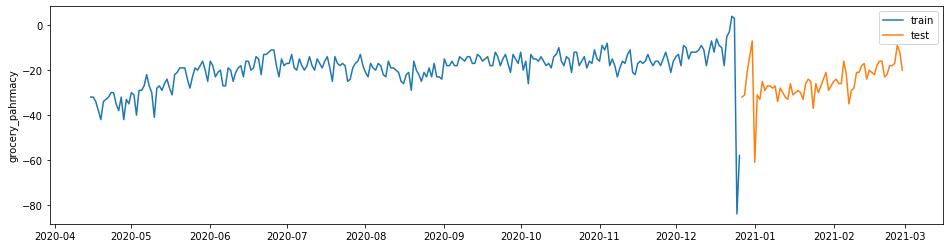

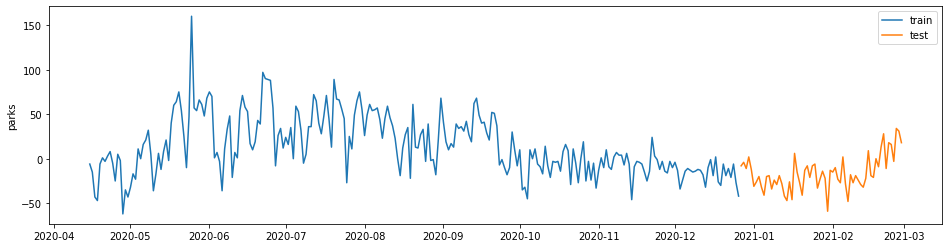

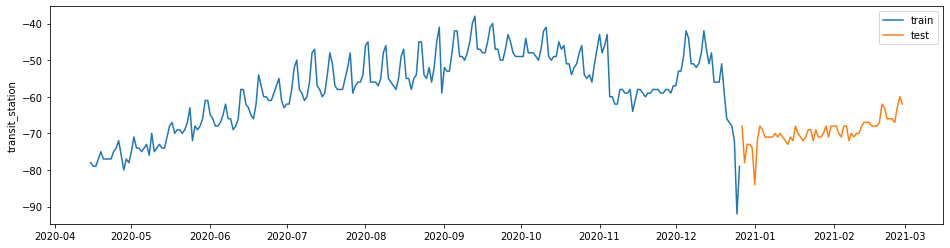

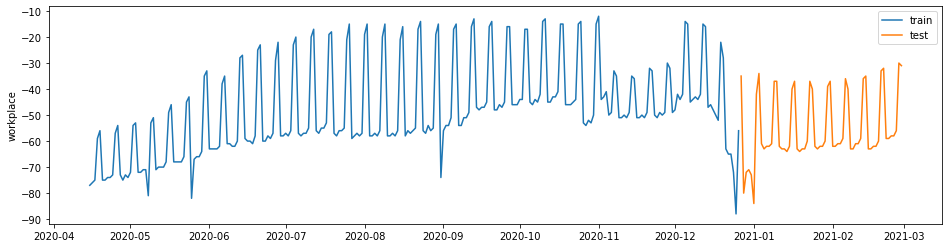

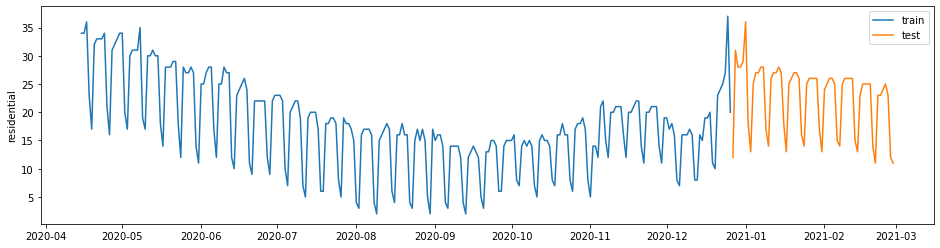

In [24]:
# PLot data train & test

for col in df.columns:
    plot_sensor(col)

In [25]:
print(test)

            case  mxt  mnt   avt  retail_recreation  grocery_pahrmacy  parks  \
date                                                                           
2021-01-30  2851  7.0  3.5  5.25                -75               -29    -59   
2021-01-31  2765  7.0  3.5  5.25                -70               -27    -13   
2021-02-01  2973  9.1  1.3  5.20                -66               -25    -15   
2021-02-02  3268  9.1  1.3  5.20                -67               -24    -10   
2021-02-03  2671  9.1  1.3  5.20                -69               -26    -23   
2021-02-04  2351  9.1  1.3  5.20                -69               -26    -27   
2021-02-05  2088  9.1  1.3  5.20                -67               -16      2   
2021-02-06  1770  9.1  1.3  5.20                -70               -22    -28   
2021-02-07  1567  9.1  1.3  5.20                -75               -35    -48   
2021-02-08  1579  9.1  1.3  5.20                -69               -29    -18   
2021-02-09  1588  9.1  1.3  5.20        

In [26]:
df.tail()

,case,mxt,mnt,avt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,
2021-02-24,784,9.1,1.3,5.2,-64,-18,16,-66,-58,24
2021-02-25,678,9.1,1.3,5.2,-65,-17,-3,-67,-58,25
2021-02-26,478,9.1,1.3,5.2,-62,-9,34,-63,-56,23
2021-02-27,522,9.1,1.3,5.2,-63,-12,31,-60,-30,12
2021-02-28,629,9.1,1.3,5.2,-64,-20,18,-62,-31,11


In [28]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

LinAlgError: Matrix is not positive definite

In [29]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [30]:
# ADF test untuk setiap column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9048
 No. Lags Chosen       = 15
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0448. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "mxt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.1066
 No. Lags Chosen       = 0
 Critical value 1%     = -3.453
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.9665. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "mnt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

In [ ]:
# Difference pertama untuk stationary
df_differenced = train.diff().dropna()

In [ ]:
# ADF test pada difference pertama
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

In [ ]:
# Difference kedua untuk stationary
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF test pada difference kedua
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

In [ ]:
df_differenced.head()

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

In [ ]:
model_fitted = model.fit(12)
model_fitted.summary()

In [ ]:
# Ambil lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data untuk forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

In [ ]:
def invert_transformation(train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train[col].iloc[-1]-train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(train, df_forecast, second_diff=True)

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
df_forecast.to_csv('hasil.csv')